In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

# Simulations and Monte Carlo Simulations

**Simulations:**
* Experiments that attempt to imitate reality
* Often use computer programs

**Monte Carlo Simulations**

* Used to predict the probability of different outcomes impacted by the presence of random variables

* Rely on repeated random sampling to obtain numerical results

* Results are stochastic since the model relies on random sampling. 


## Simulation examples:
**Rolling six-sided die**

* Rolls a fair six-sided die $n$ times
* After each roll, recording the outcome
* Then places the die in a bag and selects a new one for the next roll. 


In [2]:
def roll_dice(n, seed):
    random.seed(seed)
    total_dice = 0
    point_dice = []
    for i in range(n):
        total_dice += 1 
        point_dice.append(random.randint(1,6))
    mean_point_dice = np.mean(point_dice)
    return total_dice, mean_point_dice
roll_dice(1000, 1234)

(1000, 3.557)

**The Law of Large Numbers**

As the numbers of identically distributed, randomly generated variables increases, their sample mean approaches their theoretical means. 

## Resampling as a special type of Monte Carlo Simulation

**Monte Carlo Simulation**

* Sample from probability distribution
* Distributions either known or assumed
* Rely on historical data or expertise to choose proper distribution

**Resampling**

* Sample randomly from existing data

* Existing data is implicit probability distribution 

* Assume that data is representative

**Resampling Methods**

1. Sampling without replacement 

2. Sampling with replacement (or bootstrapping)

Use to estimate the sampling distribution of almost any statistic

3. Permutation

Often used to compare two groups

                                
                             

**Bootstrapping**

Estimate the 95% confidence interval for the mean height of NBA players

In [3]:
nba_heights = [196, 191, 198, 216, 188, 185, 211, 201,188, 191, 201, 208, 191, 183, 196]
simu_heights = []
for i in range(1000):
    bootstrap_sample = random.choices(nba_heights, k = 15)  # random.choices: choose one each time and with replacement
    simu_heights.append(bootstrap_sample)
upper = np.quantile(simu_heights, 0.975)
lower = np.quantile(simu_heights, 0.025)
print(np.mean(simu_heights), upper, lower)

196.14453333333333 216.0 183.0


**Permutation** 

Estimate 95% confidence interval of the mean difference between heights of NBA players and US adults males 

Are NBA players heavier than US adult males? We are now interested in calculating the 95% confidence interval of the mean difference (in kilograms) between NBA players and US adult males. Y

Permutation is great when testing for difference, so that's the resampling method you'll use here!

`nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4, 100.5, 100.3, 100.2, 100.6]`

`us_adult_weights = [75.1, 100.1, 95.2, 81.0, 72.0, 63.5, 80.0, 97.1, 94.3, 80.3, 93.5, 85.8, 95.1]`

Note that each of the above lists has 13 weights listed.


In [4]:
nba_weights = [96.7, 101.1, 97.9, 98.1, 98.1, 100.3, 101.0, 98.0, 97.4, 100.5, 100.3, 100.2, 100.6]
us_adult_weights = [75.1, 100.1, 95.2, 81.0, 72.0, 63.5, 80.0, 97.1, 94.3, 80.3, 93.5, 85.8, 95.1]
# Define all_weights
all_weights = us_adult_weights + nba_weights
simu_diff = []

for i in range(1000):
    # Perform the permutation on all_weights
    perm_sample = np.random.permutation(all_weights)
    # Assign the permutated samples to perm_nba and perm_adult
    perm_nba, perm_adult = perm_sample[0:13], perm_sample[13:26]
    perm_diff = np.mean(perm_nba) - np.mean(perm_adult)
    simu_diff.append(perm_diff)
mean_diff = np.mean(nba_weights) - np.mean(us_adult_weights) 
upper = np.quantile(simu_diff, 0.975)
lower = np.quantile(simu_diff, 0.025)
print(mean_diff, lower, upper)

13.630769230769246 -8.015769230769234 7.754230769230783


# Monte Carlo Simulation

## Paired dice simulation

We will roll two dice from two bags, and each bag contains three biased dice.
```python
bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]
```
The difference is that the dice in the two bags are paired: if you pick the second die in `bag1`, you will also pick the second die in `bag2`. In each trial:

You pick one pair of dice from the two bags randomly and roll them
Success occurs if the points on `dice1` and `dice2` add up to eight; otherwise, failure
The task is to complete the for-loop in the `roll_paired_biased_dice()` function and to use this function to calculate the probabilities of success for each unique combination of points on dice1 and dice2.

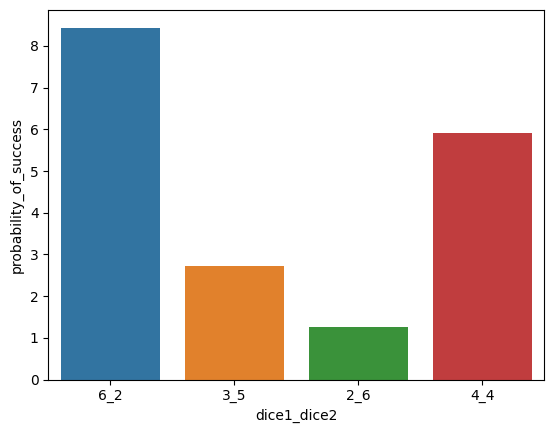

In [5]:
bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]
bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]


def roll_paired_biased_dice(n, seed = 1231):
    random.seed(seed)
    results={}
    for i in range(n):
        bag_index = random.randint(0, 1)
        # Obtain the dice indices
        dice_index1 = random.randint(0,5)
        dice_index2 = random.randint(0,5)
        # Sample a pair of dice from bag1 and bag2
        point1 = bag1[bag_index][dice_index1] # List indexing
        point2 = bag2[bag_index][dice_index2]
        key = "%s_%s" % (point1,point2) # use of string formatting in Python to create a key by concatenating two variables (point1 and point2) using a specified format.
        if point1 + point2 == 8: 
            if key not in results:
                results[key] = 1
            else:
                results[key] += 1
    return(pd.DataFrame.from_dict({'dice1_dice2':results.keys(),'probability_of_success':np.array(list(results.values()))*100.0/n}))

# Run the simulation 10,000 times and assign the result to df_results
df_results = roll_paired_biased_dice(10000, seed=1231)
sns.barplot(x = "dice1_dice2", y = "probability_of_success", data = df_results)
plt.show()


## Simulation Steps 

1. Define the input variables and pick probability distribution for them

2. Generate inputs by sampling from these distributions

3. Perform a deterministic calculation of the simulated inputs

4. Summarize results

**Deterministic calculation on PI**

In this exercise and the next, you'll play around with the pi calculations from the video to further understand the importance of each step in the simulation process.

Recall that the simulation to find pi generates random points $(x,y)$ where $x$ and $y$ are between -1 and 1, as shown in the graph below.

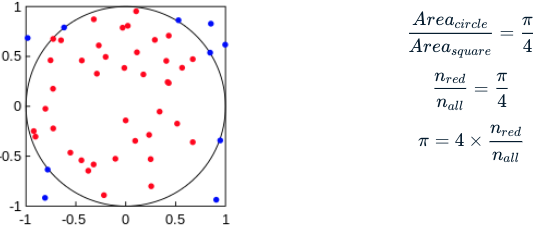

In [6]:
n = 1000000
circle_points = 0 
square_points = 0 
for i in range(n):
    x = random.uniform(-1, 1)
    y = random.uniform(-1, 1)
    dist_from_origin = x ** 2 + y ** 2
    # Increment circle_points for any point with a distance from origin of less than .75
    if dist_from_origin <= 1:
        circle_points += 1
    square_points += 1
pi = 4 * circle_points / square_points
print(pi)

3.142528


## Generating Discrete Random Variable

Betting between Tom and Eva
It's time to play a game between Tom and Eva!

Recall that Tom has a regular six-faced die and the results of rolling it follow a discrete uniform distribution in the interval of one and six. Eva has a biased coin that has a probability p of turning heads. The distribution of the number of flips Eva needs to land heads is geometric.

Here are the rules of the game:

Tom's score: the point of the rolled die
Eva's score: the number of flips needed to land heads
The person with the highest score wins
Your task is to simulate this game! For the list of possible ``` p ``` values ```[0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]``` representing the probability of Eva's coin flipping heads, who do you expect to win?


In [7]:
for p in [0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9]: 
    low = 1
    high = 7
    # Simulate rolling Tom's die 10,000 times
    die_samples = st.randint.rvs(low, high, size = 10000)
    # Simulate Eva's coin flips to land heads 10,000 times
    coin_samples = st.geom.rvs(p, size = 10000)
    diff = np.mean(die_samples - coin_samples)
    print(diff)

-6.5322
-1.5597
0.1603
1.4861
2.0354
2.273
2.3802


## Generate Continuous Random Variable

Two independent normal distributions
Rohit has two freelance jobs. The pay for each job follows two independent normal distributions:

-```income1``` from Rohit's first job has a mean of \\$500 and a standard deviation of \\$50

-```income2``` from Rohit's second job has a mean of \\\$1,000 and a standard deviation of \\$200

Rohit has asked for your help simulating his income so that he can budget his expenses properly. You'll use sampling to find the 95% confidence interval of Rohit's total income from both jobs.

You are going to perform simulations using normal distributions, which are probably the most important probability distribution used in Monte Carlo simulation.

In [8]:
# Sample from the normal distribution
income1 = st.norm.rvs(loc = 500, scale = 50, size = 1000)
income2 = st.norm.rvs(loc = 1000, scale = 200, size = 1000)

# Define total_income
total_income = income1 + income2
upper = np.quantile(total_income, 0.975)
lower = np.quantile(total_income, 0.025)
print([lower, upper])

[1139.326180899848, 1892.7181391373792]


## Generate Multivariate Random Variables 

In probability theory, the multinomial distribution is a generalization of the binomial distribution. For example, it models the probability of counts for each side of a k-sided dice rolled n times. For n independent trials each of which leads to a success for exactly one of k categories, with each category having a given fixed success probability, the multinomial distribution gives the probability of any particular combination of numbers of successes for the various categories.

When k is 2 and n is 1, the multinomial distribution is the Bernoulli distribution. When k is 2 and n is bigger than 1, it is the binomial distribution. When k is bigger than 2 and n is 1, it is the categorical distribution. The term "multinoulli" is sometimes used for the categorical distribution to emphasize this four-way relationship (so n determines the prefix, and k the suffix).

*Multivariate normal sampling*

In this exercise, you'll continue working with the `house_price_size` DataFrame, which has been loaded for you. As a reminder, `house_price_size` contains two columns called price and size representing the `price` and `size` of houses in that order.

Having explored the `house_price_size` DataFrame, you suspect that this is a multivariate normal distribution because `price` and `size` each seem to follow a normal distribution. Based on the covariance matrix that you calculated in the previous exercise, you can now perform multivariate normal distribution sampling with a defined covariance structure!

To perform multivariate normal distribution sampling with defined covariance, you'll need the following information:

`price` has a mean of 20 and `size` has a mean of 500
`price` has a variance of 19 and `size` has a variance of 50,000
The covariance for `price` and `size` is 950
You'll sample 5,000 times

* Set up the parameters for multivariate normal sampling based on the stated means, variances, covariance, and sample size.

* Simulate the results with sampling by using `st.multivariate_normal.rvs()`; store the results as simulated_results.
Visualize the results using a `pairplot()`.

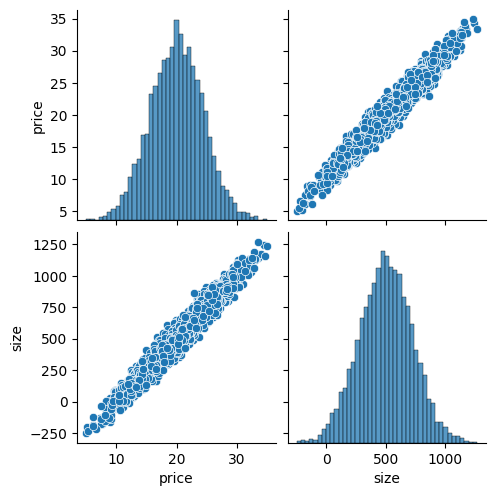

In [9]:
mean_value = [20, 500]
sample_size_value = 5000
cov_mat = np.array([[19, 950], [950, 50000]])

# Simulate the results using sampling
simulated_results = st.multivariate_normal.rvs(mean = mean_value, size = sample_size_value, cov = cov_mat)
simulated_house_price_size = pd.DataFrame({"price":simulated_results[:,0],
                                           "size":simulated_results[:,1]})

# Visualize the results 
sns.pairplot(simulated_house_price_size)
plt.show()

# Principled Monte Carlo Simulation

## Explore the data

In [10]:
dia = pd.read_csv(r"D:\Python_Jupyter\diabetes.csv")

In [11]:
dia.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


### Examining tc, ldl, and hdl
The diabetes dataset, `dia`, will be used as the real-world example for both this chapter and the next. Proper data exploration is a foundation for performing effective Monte Carlo simulations, so you'll continue exploring the data in the exercises!

In this exercise, you'll focus on three variables: `tc`, `ldl`, and `hdl`. 

Use the `pairplot()` function in `seaborn` to visually examine the relationship between the columns `t`c, `ldl`, and `hdl` in `dia` (specified in that order).
Use the `.corr()` method from pandas to measure the correlation coefficients between `tc`, `ldl`, and `hdl` in `dia` (specified in that order).

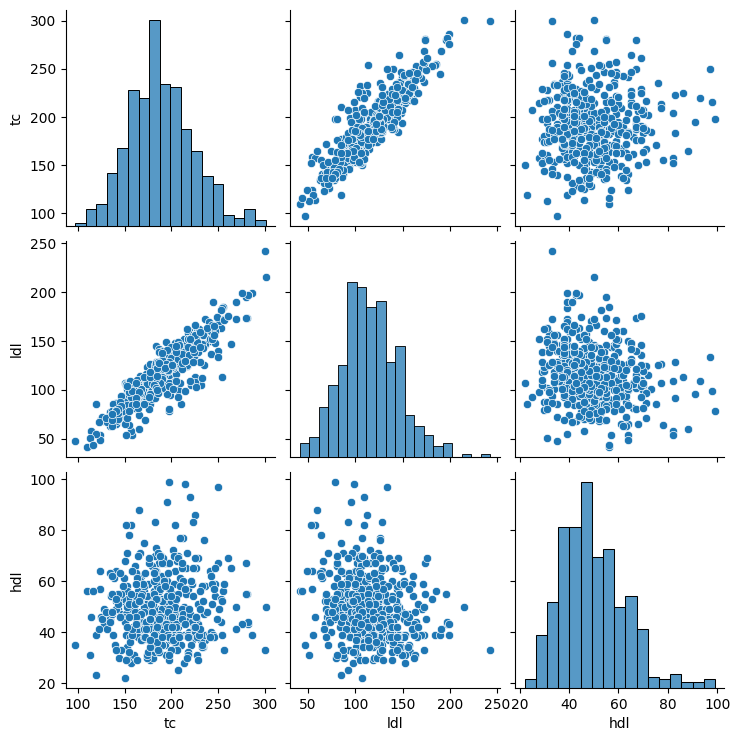

           tc       ldl       hdl
tc   1.000000  0.896663  0.051519
ldl  0.896663  1.000000 -0.196455
hdl  0.051519 -0.196455  1.000000


In [12]:
# Create a pairplot of tc, ldl, and hdl
sns.pairplot(dia[["tc","ldl","hdl"]])
plt.show()

# Calculate correlation coefficients
print(dia[["tc","ldl","hdl"]].corr())

## Try other candidate distributions

**Maximum Likelihood Estimation(MLE)**

* Used to select a probability distribution by measuring fit: Distribution yielding highest likelihood given the data is considered optimal

* Scipy's `.nnlf()` used to calculate the negative likelihood function

* The lower the MLE value calculated using `.nnlf()`. the better the fit

Proper choice of input probability distributions is key for performing Monte Carlo simulations. Three distributions were evaluated to determine which was the best fit for the age variable. Those distributions were the Laplace, normal, and exponential distributions. 

Use `.fit()` to fit a distribution to the age data; then use `.nnlf()` to obtain the Maximum Likelihood Estimation `(MLE)` value of the fitting.

In [13]:
distributions = [st.uniform, st.norm, st.expon]
mles = []
for distribution in distributions:
    # Fit the distribution and obtain the MLE value
    pars = distribution.fit(dia["age"])
    mle = distribution.nnlf(pars,dia["age"])
    mles.append(mle)
print(mles)

[1809.7002965021684, 1764.0693689033028, 1938.171599681118]


## Input with correlations

**Compare simulated and historical data**

A good simulation should have similar results to the historical data. First, We will perform a simulation using the multivariate normal distribution and the mean and covariance matrix of `dia`. Then, We'll check the means of both the historical and simulated data to see if they are similar.

* Perform the simulation 10,000 times using the multivariate normal distribution and the mean and covariance matrix of `dia`.

* Use the `.mean()` function in pandas to calculate the mean values of the `bmi` and `tc` columns of the historical dataset `dia` and the simulated `bmi` and `tc` results from` df_results` to assess whether they are similar.

* Similarly, use `.cov()` from pandas to calculate the covariance matrix of the `bmi` and `tc` columns of `dia` and the simulated `bmi` and `tc` results from `df_results` to assess whether they are similar.


In [14]:
cov_dia = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].cov()
mean_dia = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].mean()

# Complete the code to perform the simulation
simulation_results = st.multivariate_normal.rvs(mean = mean_dia, size = 10000, cov = cov_dia)

df_results = pd.DataFrame(simulation_results,columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])

# Calculate bmi and tc means for the historical and simulated results
print("Historical Means for BMI and TC : \n" , dia[["bmi","tc"]].mean())

print("Simulated Means for BMI and TC : \n", df_results[["bmi","tc"]].mean())
      
# Calculate bmi and tc covariances for the historical and simulated results
print(dia[["bmi","tc"]].cov())
print(df_results[["bmi","tc"]].cov())

Historical Means for BMI and TC : 
 bmi     26.375792
tc     189.140271
dtype: float64
Simulated Means for BMI and TC : 
 bmi     26.416179
tc     188.965578
dtype: float64
           bmi           tc
bmi  19.519798    38.191612
tc   38.191612  1197.717241
           bmi           tc
bmi  19.738767    37.259187
tc   37.259187  1219.699109


In [15]:
# Calculate the covariance matrix of bmi and tc
cov_dia2 = dia[["bmi", "tc"]].cov()

# Calculate the correlation matrix of bmi and tc
corr_dia2 = dia[["bmi", "tc"]].corr()
std_dia2 = dia[["bmi","tc"]].std()

print(f'Covariance of bmi and tc from covariance matrix :{cov_dia2.iloc[0,1]}')
print(f'Covariance of bmi and tc from correlation matrix :{corr_dia2.iloc[0,1] * std_dia2[0] * std_dia2[1]}')

Covariance of bmi and tc from covariance matrix :38.191612029427155
Covariance of bmi and tc from correlation matrix :38.191612029427176


## Why do we need simulations?
We've performed a multivariate normal distribution using the mean and covariance matrix of `dia`. Now, we'll answer questions of interest using the simulated results!

 Why do we perform simulations when we have historical data? Can't we just use the data itself to answer questions of interest?

This is a great question. Monte Carlo simulations are based on modeling using probability distributions, which yield the whole probability distribution for inspection (a large number of samples), rather than the limited number of data points available in the historical data.

For example, we can ask questions like what is the 0.1st quantile of the age variable for the diabetes patients in our simulation? We can't answer this question with the historical data `dia` itself: because it only has 442 records, we can't calculate what the one-thousandth value is. Instead, you can leverage the results of a Monte Carlo simulation, which you'll do now!

* Calculate the 0.1st quantile (the bottom 1,000th) of the `tc` variable in the simulated results.

In [16]:
cov_dia = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].cov()
mean_dia = dia[["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]].mean()

simulation_results = st.multivariate_normal.rvs(mean=mean_dia, size=10000, cov=cov_dia)

df_results = pd.DataFrame(simulation_results, columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])

# Calculate the 0.1st quantile of the tc variable
print(np.quantile(df_results["tc"],0.001))

85.27861905625278


## Evaluating BMI outcomes
What is the difference in the predicted disease progression (the response, `y`) for patients who are in the top 10% of BMI compared to the lowest 10% of BMI? We'll use the results of a simulation sampling the multivariate normal distribution to answer this question!



In [17]:
from sklearn.linear_model import LinearRegression
X = dia.drop(['y','sex'], axis = 1)
y = dia['y']
regr_model = LinearRegression().fit(X,y)
simulation_results = st.multivariate_normal.rvs(mean=mean_dia, size=20000, cov=cov_dia)
df_results = pd.DataFrame(simulation_results,columns=["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"])
predicted_y = regr_model.predict(df_results)
df_y = pd.DataFrame(predicted_y, columns=["predicted_y"])
df_summary = pd.concat([df_results,df_y], axis=1)
df_summary.head()

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,predicted_y
0,63.220787,28.996658,70.689709,215.410268,129.154476,56.442274,4.720369,4.884639,92.340281,150.028008
1,19.911236,23.048262,82.182440,177.482399,96.203935,61.456067,3.447691,4.477289,85.519656,113.135054
2,58.791510,28.532517,112.459066,243.815344,157.665743,52.763957,4.794362,5.347685,105.560297,211.452458
3,46.373657,32.599788,106.972881,220.692201,132.584305,48.328429,4.779111,5.256623,113.126081,231.222576
4,61.052721,24.888729,99.689462,145.074542,105.604091,26.517157,5.185473,4.158137,77.906568,140.447770


* Use `np.quantile()` to calculate the 10th and 90th quantile of `bmi` in the simulated results, saving as `bmi_q10` and `bmi_q90`.
* Use `bmi_q10` and `bmi_q90` to filter `df_summary` and obtain predicted y values.

In [18]:
# Calculate the 10th and 90th quantile of bmi in the simulated results
bmi_q10 = np.quantile(df_summary["bmi"], 0.1)
bmi_q90 = np.quantile(df_summary["bmi"], 0.9)

# Use bmi_q10 and bmi_q90 to filter df_summary and obtain predicted y values
mean_bmi_q90_outcome = np.mean(df_summary[df_summary["bmi"]>bmi_q90]["predicted_y"]) 
mean_bmi_q10_outcome = np.mean(df_summary[df_summary["bmi"]<bmi_q10]["predicted_y"])
y_diff = mean_bmi_q90_outcome - mean_bmi_q10_outcome
print(y_diff)

157.54157908778726


## Evaluating BMI and HDL outcomes
What is the difference in the predicted disease progression (the response `y`) for patients who are in both the top 10% of BMI and the top 25% of HDL compared to those in both the lowest 10% of BMI and the lowest 25% of HDL?

Complete the mean outcome definitions by filtering the results for patients who are in the both top 10% of BMI and the top 25% of HDL and then for patients who are in both the lowest 10% of BMI and the lowest 25% of HDL, leveraging `hdl_q25`, `hdl_q75`, `bmi_q10`, `bmi_q90`, which are already defined for you.

In [19]:
hdl_q25 = np.quantile(df_summary["hdl"], 0.25)
hdl_q75 = np.quantile(df_summary["hdl"], 0.75)
bmi_q10 = np.quantile(df_summary["bmi"], 0.10)
bmi_q90 = np.quantile(df_summary["bmi"], 0.90)

# Complete the mean outcome definitions
bmi_q90_hdl_q75_outcome = np.mean(df_summary[(df_summary["bmi"] > bmi_q90) & (df_summary["hdl"] > hdl_q75)]["predicted_y"]) 
bmi_q10_hdl_q15_outcome = np.mean(df_summary[(df_summary["bmi"] < bmi_q10) & (df_summary["hdl"] < hdl_q25)]["predicted_y"]) 
y_diff = bmi_q90_hdl_q75_outcome - bmi_q10_hdl_q15_outcome
print(y_diff)

89.88922120325127


# Model Checking and Results Interpretation

## Choosing variable probability distribution 

1. Gain an intuitive understanding of data and available probability distribution 

2. Use Maximum Likelihood Estimation (MLE) to compare candidate distribution

3. Use Kolmogorov-Smirnov test to evaluate goodness of fit of probability distributions
  * Quantifies distance between the empirical distribution of the data and the theoretical candidate probability distribution
  * Use `scipy.stats.kstest()` to calculate



Note that `fit()` is a generic method available for many statistical distributions in `scipy.stats`. It attempts to find the maximum likelihood estimates (MLE) of the parameters that best fit the given data.

**The Kolmogorov-Smirnov test** is a statistical test used to determine whether a sample comes from a specific probability distribution. It is a nonparametric test, meaning it does not assume any specific distribution for the data.

The Kolmogorov-Smirnov test compares the empirical cumulative distribution function (ECDF) of the sample data with the cumulative distribution function (CDF) of the theoretical distribution. The test statistic, denoted as D, is the maximum vertical distance between the ECDF and the CDF. The null hypothesis assumes that the sample is drawn from the specified theoretical distribution.

Here are some key details and steps involved in conducting the Kolmogorov-Smirnov test:

* Null Hypothesis (`H0`) and Alternative Hypothesis (`Ha`):

`H0`: The sample is drawn from the specified theoretical distribution.
`Ha`: The sample is not drawn from the specified theoretical distribution.

* Test Statistic (D):

The test statistic D is the maximum absolute difference between the ECDF and the CDF.
D represents the largest discrepancy between the observed data and the expected distribution.
Larger values of D indicate stronger evidence against the null hypothesis.

* Critical Value and p-value:

The critical value is a threshold used to compare the test statistic against a specific significance level (alpha).
The p-value represents the probability of obtaining a test statistic as extreme as, or more extreme than, the observed value under the null hypothesis.
If the p-value is less than the significance level (alpha), typically 0.05, the null hypothesis is rejected, suggesting that the sample does not come from the specified theoretical distribution.

** Evaluating distribution fit for the `ldl` variable**

We'll focus on one variable of the diabetes dataset `dia`: the `ldl` blood serum. We'll determine whether the normal distribution is a still good choice for `ldl` based on the additional information provided by a Kolmogorov-Smirnov test.

* Define a list called `list_of_dists` containing your candidate distributions: Laplace, normal, and exponential (in that order); use the correct names from `scipy.stats`.
* Inside the loop, fit the data with the corresponding probability distribution, saving as `param`.
* Perform a Kolmogorov–Smirnov test to evaluate goodness-of-fit, saving the results as result.

In [20]:
# List candidate distributions to evaluate
list_of_dists = ["laplace", "norm", "expon"]
for i in list_of_dists:
    dist = getattr(st, i)
    # Fit the data to the probability distribution
    param = dist.fit(dia["ldl"])
    # Perform the ks test to evaluate goodness-of-fit
    result = st.kstest(dia["ldl"], i, args = param)
    print(result)

KstestResult(statistic=0.06416228045269268, pvalue=0.05026538465299435, statistic_location=125.0, statistic_sign=-1)
KstestResult(statistic=0.04977872283458512, pvalue=0.21612589008862504, statistic_location=107.6, statistic_sign=1)
KstestResult(statistic=0.30715826921004374, pvalue=1.6118927860146716e-37, statistic_location=84.2, statistic_sign=-1)


In [21]:
df_summary.head()

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu,predicted_y
0,63.220787,28.996658,70.689709,215.410268,129.154476,56.442274,4.720369,4.884639,92.340281,150.028008
1,19.911236,23.048262,82.182440,177.482399,96.203935,61.456067,3.447691,4.477289,85.519656,113.135054
2,58.791510,28.532517,112.459066,243.815344,157.665743,52.763957,4.794362,5.347685,105.560297,211.452458
3,46.373657,32.599788,106.972881,220.692201,132.584305,48.328429,4.779111,5.256623,113.126081,231.222576
4,61.052721,24.888729,99.689462,145.074542,105.604091,26.517157,5.185473,4.158137,77.906568,140.447770


In [22]:
df_diffs = pd.DataFrame()
for i in range(1000):
    np.random.seed(i)
    dic_diffs = {}
    for var in ["age", "bmi", "bp", "tc", "ldl", "hdl", "tch", "ltg", "glu"]:    
        var_q25 = np.quantile(df_summary[var], 0.25)    
        var_q75 = np.quantile(df_summary[var], 0.75)
        # Add random noise to the calculations
        var_q25 += np.random.normal(scale=0.01)
        var_q75 += np.random.normal(scale=0.01)
        q75_outcome = np.mean(df_summary[(df_summary[var] > var_q75)]["predicted_y"])    
        q25_outcome = np.mean(df_summary[(df_summary[var] < var_q25)]["predicted_y"])    
        y_diff = q75_outcome - q25_outcome    
        dic_diffs[var] = [y_diff]
     # Append the results of each iteration to the list
    df_diffs = pd.concat([df_diffs, pd.DataFrame(dic_diffs, index=[0])], ignore_index=True)

df_diffs.head()

,age,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,38.448631,114.360213,86.039541,40.444908,33.821502,-77.654915,84.349608,110.502599,73.786964
1,38.448315,114.317206,86.063715,40.437193,33.823671,-77.631828,84.509086,109.182265,73.824459
2,38.455081,114.600659,86.125140,40.439506,33.873492,-77.642622,84.331868,109.837435,73.878802
3,38.448631,114.209203,86.101608,40.419179,33.843900,-77.635635,84.653676,110.271700,73.787493
4,38.438945,114.475456,86.096839,40.442721,33.841401,-77.669823,84.470625,111.559425,73.902861


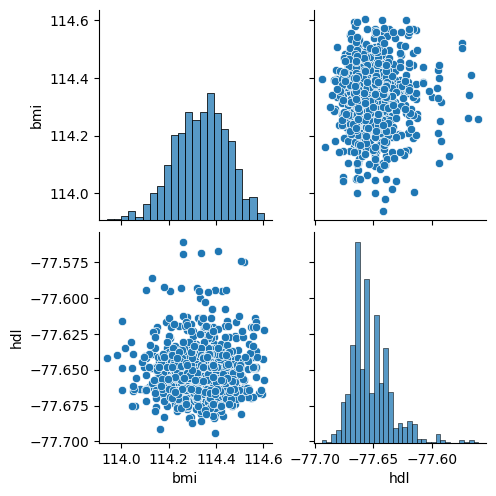

In [23]:
# Create a pairplot of bmi and hdl
sns.pairplot(df_diffs[["bmi","hdl"]])
plt.show()

* Plot a cluster map to examine the correlation of `bmi` and `hdl` (specified in that order) from `df_diffs`.

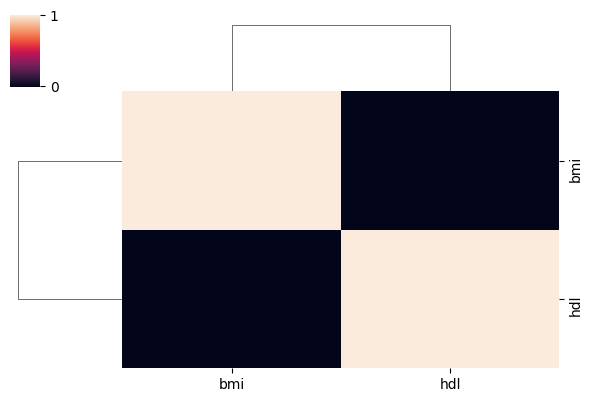

In [24]:
# Plot a cluster map of the correlation between bmi and hdl
sns.clustermap(df_diffs[["bmi","hdl"]].corr(), figsize=(6, 4))
plt.show()

## Exploring with box plots
Two common formats of `DataFrames` are the wide format and long format. The wide format shows different variables represented in different columns, while the long format displays different variables represented by two columns together (one for the variable name and the other for the corresponding values).

Long versions of `DataFrames` can be useful for easily creating different visualizations, including the `boxplot` that you will create in this exercise after converting `df_diffs` (loaded for you) from wide to long format.

* Convert the `bmi` and `hdl` columns (specified in that order) of the `df_diffs` DataFrame from wide to long format; save the long DataFrame as `hdl_bmi_long` and name the column that will contain the variable values `y_diff`.

* Use a `boxplot` to visualize the results of patients in the first or last quartile of the `hdl` and `bmi` variables.

  variable      y_diff
0      bmi  114.360213
1      bmi  114.317206
2      bmi  114.600659
3      bmi  114.209203
4      bmi  114.475456


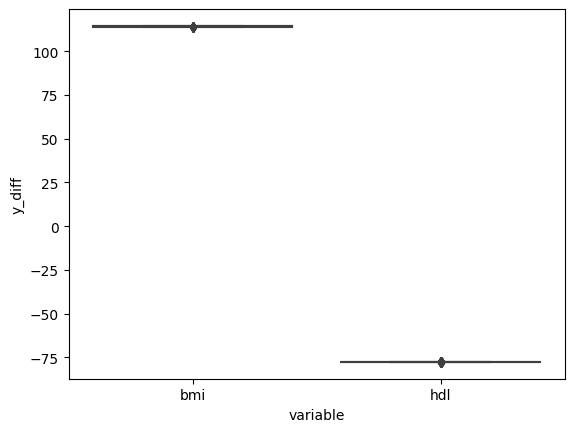

In [25]:
# Convert the hdl and bmi columns of df_diffs from wide to long format, naming the values column "y_diff"
hdl_bmi_long = df_diffs.melt(value_name="y_diff", value_vars=["bmi","hdl"])
print(hdl_bmi_long.head())

# Use a boxplot to visualize the results
sns.boxplot(x = "variable", y = "y_diff", data=hdl_bmi_long)
plt.show()

# Sensitive Analysis

## Simulation of a profit problem
You work for a company that manufactures industrial equipment. The sales price of each piece of equipment is \\$100,000. You also know that there is a strong negative correlation between the inflation_rate and sales volume. This relationship is captured by the covariance matrix `cov_matrix`.

The function `profit_next_year_mc()` performs a Monte Carlo simulation returning expected profit (in thousands of dollars), given the mean inflation rate and mean sales volume as arguments. `n`, the number of time the simulation should be run.

In [26]:
def profit_next_year_mc(mean_inflation, mean_volume, n):
  profits = []
  for i in range(n):
    # Generate inputs by sampling from the multivariate normal distribution
    rate_sales_volume = st.multivariate_normal.rvs(mean = [mean_inflation,mean_volume], cov = cov_matrix,size = 1000)
    # Deterministic calculation of company profit
    price = 100 * (100 + rate_sales_volume[:,0])/100
    volume = rate_sales_volume[:,1]
    loan_and_cost = 50 * volume + 45 * (100 + 3 * rate_sales_volume[:,0]) * (volume/100)
    profit = (np.mean(price * volume - loan_and_cost))
    profits.append(profit)
  return profits

* Perform a Monte Carlo simulation by running `profit_next_year_mc()` 500 times using a `mean_inflation` of `2` and a `mean_volume` of 500.
* Visualize the simulation results using a `displot`

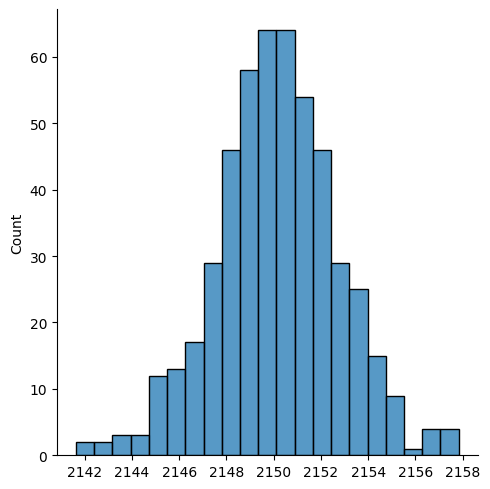

In [27]:
cov_matrix = np.array([[0.2, -0.3],[-0.3, 30]])
profits = profit_next_year_mc(2,500,500)

# Create a displot of the results
sns.displot(profits)
plt.show()

## Company sensitivity analysis
We'll now examine what would happen to profits for the company from the previous exercise at a variety of mean_inflation and mean_volume values. This will help the company plan for several levels of inflation and sales volumes since no company can ever be certain what inflation or sales volumes they will have in the future.

The mean inflation percentages you'd like to explore are `0, 1, 2, 5, 10, 15, 20, 50`, while the sales values for use as the mean volume value are `100, 200, 500, 800, 1000`. As a reminder, here is the `profit_next_year_mc()` function definition.

* Complete the Monte Carlo simulation by running `profit_next_year_mc()` to calculate profit 100 times, each time looping through the list of `infl` values and the list of `vol` values.
* Use a `displot` to visualize the simulation results saved in the `Profit` column of the resulting DataFrame.

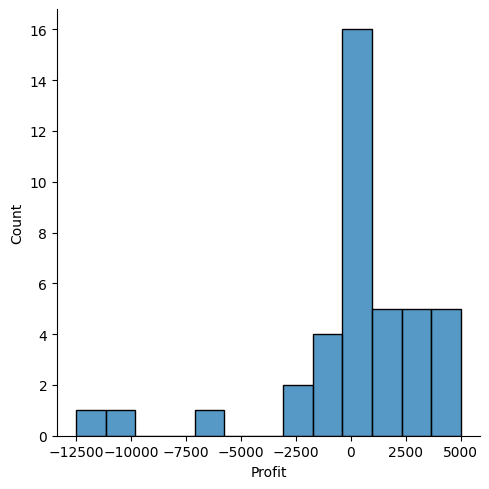

In [28]:
x1 = []
x2 = []
y = []
for infl in [0, 1, 2, 5, 10, 15, 20, 50]:
    for vol in [100, 200, 500, 800, 1000]:
		# Run profit_next_year_mc so that it samples 100 times for each infl and vol combination
        avg_prof = np.mean(profit_next_year_mc(infl, vol, 100))
        x1.append(infl)
        x2.append(vol)
        y.append(avg_prof)
df_sa = pd.concat([pd.Series(x1), pd.Series(x2), pd.Series(y)], axis=1)
df_sa.columns = ["Inflation", "Volume", "Profit"]
# Create a displot of the simulation results for "Profit"
sns.displot(df_sa['Profit'])
plt.show()

Complete the hexbin plot code to visualize the sensitivity analysis results; use `Inflation` as the x-axis, `Volume` as the y-axis, and the mean values of `Profits` as the basis for the color of the hexbins.

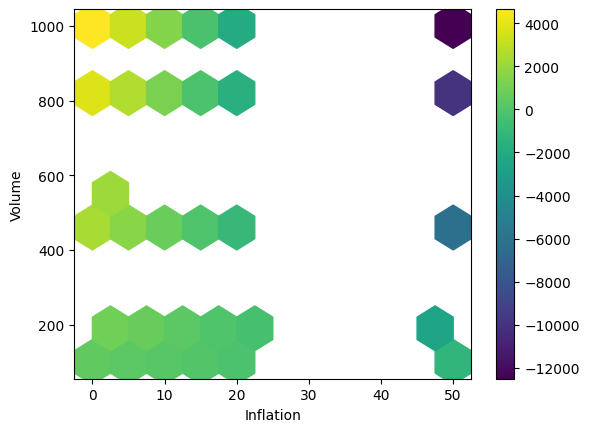

In [29]:
# Complete the hexbin to visualize sensitivity analysis results
df_sa.plot.hexbin(x='Inflation',
     y='Volume',
     C='Profit',
     reduce_C_function=np.mean,
     gridsize=10,
     cmap="viridis",
     sharex=False)
plt.show()